___
## Inferential Model

In [280]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [281]:
inf = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

In [282]:
# We want to select all featues that a homeowner can potentially change to increase the sale price of their home
# Street (Dummy)
# Utilities (Dummy)
# Overall Qual (Good)
# Overall Cond (Good)
# Roof Matl (Dummy)
# Exterior 1st (Dummy)
# Exter Qual (Make Numeric Ordinal)
# Exter Cond (Make Numeric Ordinal)
# Bsmt Qual (Make Numeric Ordinal)
# Bsmt Cond (Make Numeric Ordinal)
# BsmtFin SF 1 (Good)
# Heating QC (Make Numeric Ordinal)
# Kitchen Qual (Make Numeric Ordinal)
# Fireplace Qu (Make Numeric Ordinal)
# Garage Area (Good)
# Garage Qual (Make Numeric Ordinal)
# Garage Cond (Make Numeric Ordinal)

In [283]:
inf.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [284]:
# First, we will check for null values in these feature columns
features = ['Street', 'Utilities', 'Overall Qual', 'Overall Cond', 'Roof Matl', 'Exterior 1st', 'Exter Qual', 'Exter Cond',
            'Bsmt Qual', 'Bsmt Cond', 'BsmtFin SF 1', 'Heating QC', 'Kitchen Qual', 'Fireplace Qu', 'Garage Area',
            'Garage Qual', 'Garage Cond']

null_values_dict = {feature: inf[feature].isnull().sum() for feature in features}
pd.DataFrame(list(null_values_dict.items()), columns=['Feature', 'Null Values']).set_index('Feature')

,Null Values
Feature,
Street,0
Utilities,0
Overall Qual,0
Overall Cond,0
Roof Matl,0
Exterior 1st,0
Exter Qual,0
Exter Cond,0
Bsmt Qual,55


___
## Feature Cleaning

In [285]:
# Rename columns to have no spaces
inf.rename(columns={col: col.replace(' ', '_') for col in features}, inplace=True)

In [286]:
inf.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall_Qual',
       'Overall_Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof_Matl', 'Exterior_1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter_Qual', 'Exter_Cond', 'Foundation', 'Bsmt_Qual',
       'Bsmt_Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin_SF_1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating_QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen_Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace_Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [287]:
# I tried a column transformer and ordinal encoder but I did not work 
# Dummy Street
dummy = pd.get_dummies(inf['Street'], prefix='Street', drop_first=True)
inf = pd.concat([inf, dummy], axis=1)
inf = inf.drop('Street', axis=1)

# Dummy Utilities
dummy = pd.get_dummies(inf['Utilities'], prefix='Utilities', drop_first=True)
inf = pd.concat([inf, dummy], axis=1)
inf = inf.drop('Utilities', axis=1)

# Dummy Roof_Matl
dummy = pd.get_dummies(inf['Roof_Matl'], prefix='Roof_Matl', drop_first=True)
inf = pd.concat([inf, dummy], axis=1)
inf = inf.drop('Roof_Matl', axis=1)

# Dummy Exterior_1st
dummy = pd.get_dummies(inf['Exterior_1st'], prefix='Exterior_1st', drop_first=True)
inf = pd.concat([inf, dummy], axis=1)
inf = inf.drop('Exterior_1st', axis=1)

mapping = {'Ex': 5, 'Gd': 4,'TA': 3, 'Fa': 2, 'Po': 1}

# Numeric Ordinal these columns 
inf['Exter_Qual'] = inf['Exter_Qual'].replace(mapping)
inf['Exter_Cond'] = inf['Exter_Cond'].replace(mapping)
inf['Bsmt_Qual'] = inf['Bsmt_Qual'].replace(mapping)
inf['Bsmt_Cond'] = inf['Bsmt_Cond'].replace(mapping)
inf['Heating_QC'] = inf['Heating_QC'].replace(mapping)
inf['Kitchen_Qual'] = inf['Kitchen_Qual'].replace(mapping)
inf['Fireplace_Qu'] = inf['Fireplace_Qu'].replace(mapping)
inf['Garage_Qual'] = inf['Garage_Qual'].replace(mapping)
inf['Garage_Cond'] = inf['Garage_Cond'].replace(mapping)

# Lastly we will NA with 0, since we see NA means 'does not own feature' in the data dictionary
inf.fillna(0, inplace=True)

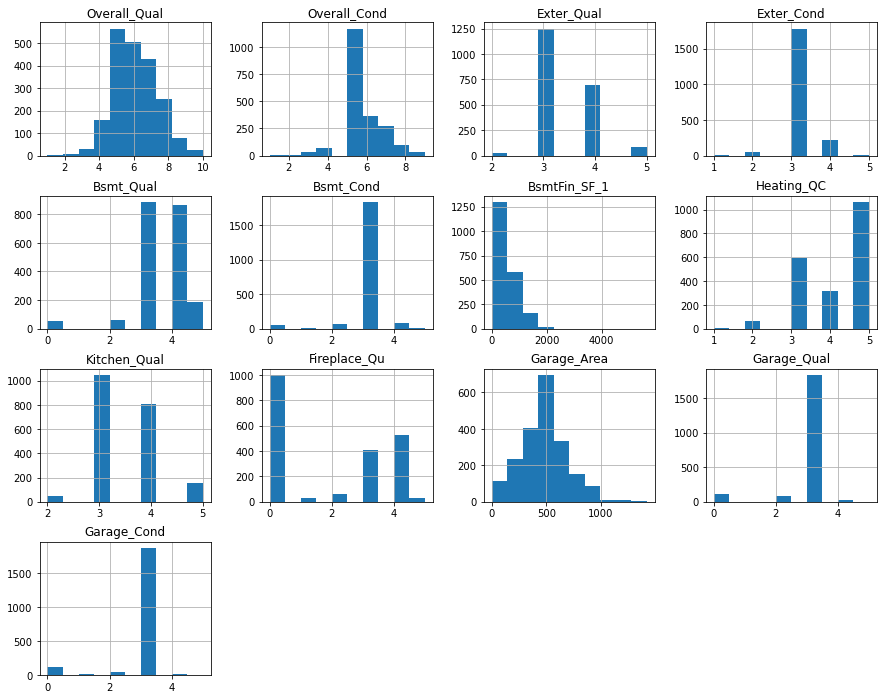

In [288]:
# Let us look at some plots for the relationships of our predictors
train_columns = inf[['Overall_Qual', 'Overall_Cond', 'Exter_Qual', 'Exter_Cond', 'Bsmt_Qual', 'Bsmt_Cond', 'BsmtFin_SF_1', 
     'Heating_QC', 'Kitchen_Qual', 'Fireplace_Qu', 'Garage_Area', 'Garage_Qual', 'Garage_Cond']]
train_columns.hist(figsize=(15, 12));

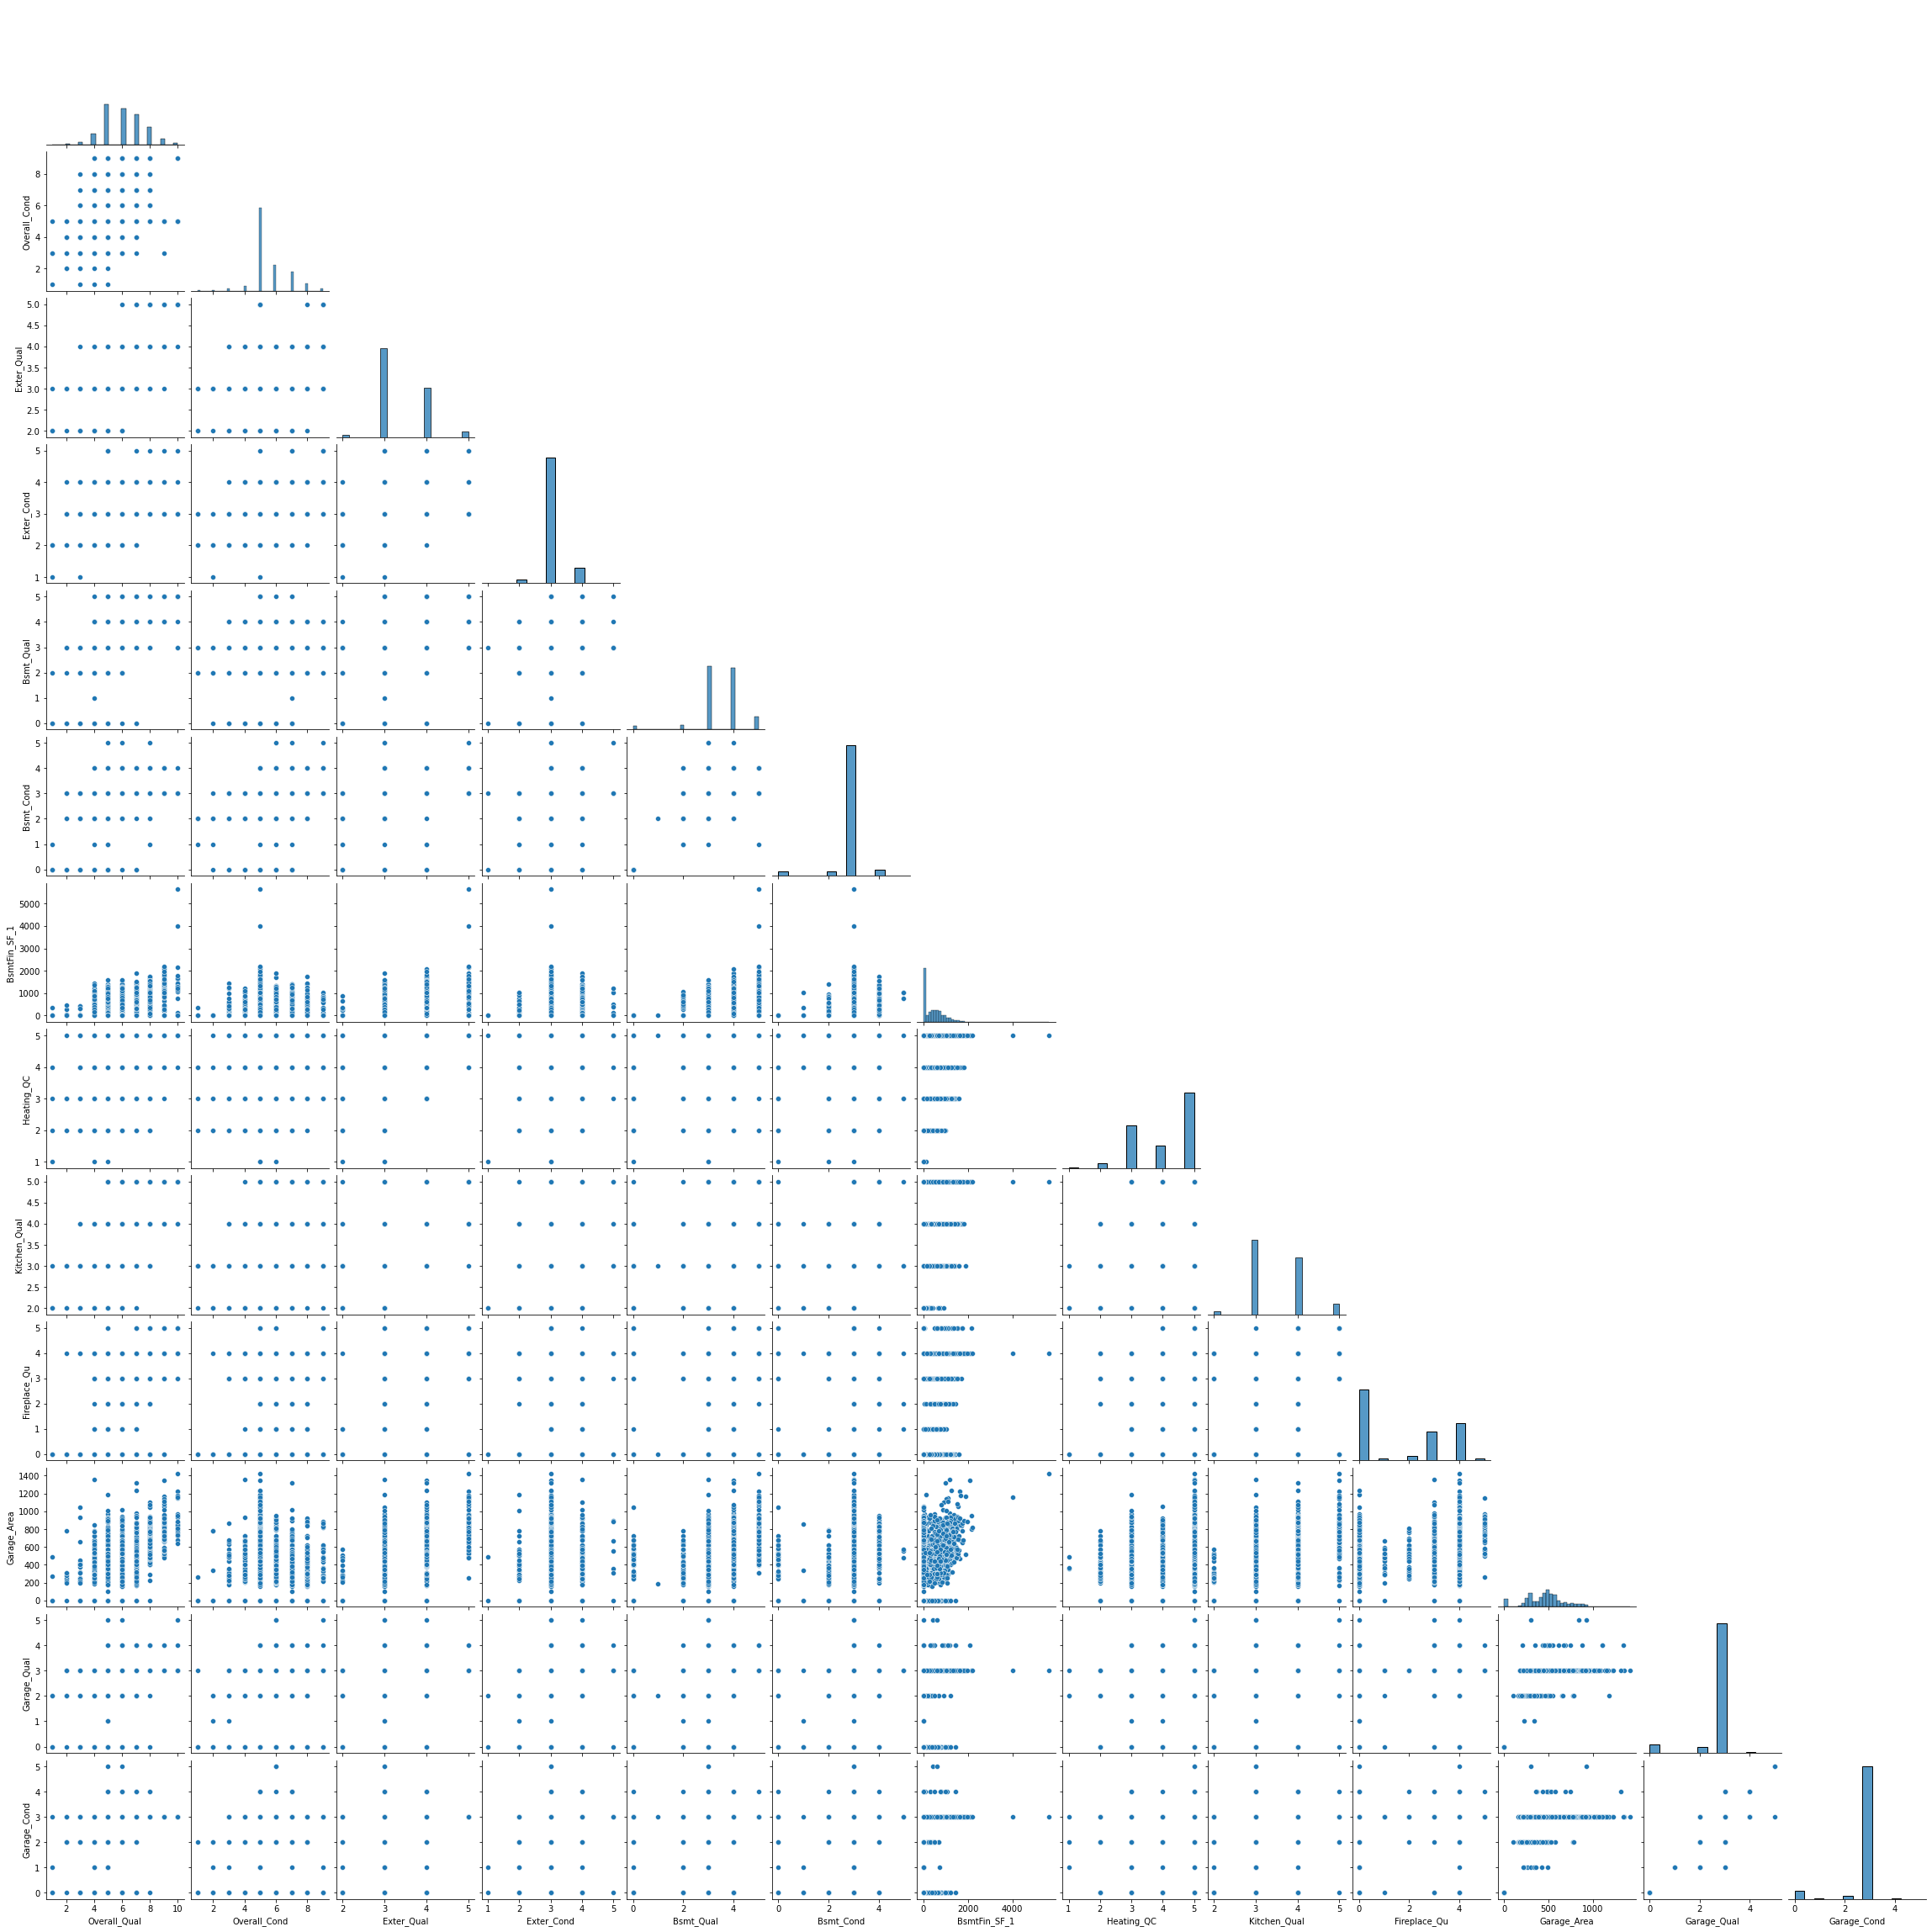

In [289]:
sns.pairplot(inf[['Overall_Qual', 'Overall_Cond', 'Exter_Qual', 'Exter_Cond', 'Bsmt_Qual', 'Bsmt_Cond', 'BsmtFin_SF_1', 
     'Heating_QC', 'Kitchen_Qual', 'Fireplace_Qu', 'Garage_Area', 'Garage_Qual', 'Garage_Cond']], corner = True);

In [290]:
# Feature Gathering
f1 = ['Overall_Qual', 'Overall_Cond', 'Exter_Qual', 'Exter_Cond', 'Bsmt_Qual', 'Bsmt_Cond', 'BsmtFin_SF_1', 
     'Heating_QC', 'Kitchen_Qual', 'Fireplace_Qu', 'Garage_Area', 'Garage_Qual', 'Garage_Cond']
cols = inf.columns[77:] # Used iloc to find the cutoff for our dummy columns
f2 = cols.tolist()
feats = f1 + f2 # Our feature set
feats

['Overall_Qual',
 'Overall_Cond',
 'Exter_Qual',
 'Exter_Cond',
 'Bsmt_Qual',
 'Bsmt_Cond',
 'BsmtFin_SF_1',
 'Heating_QC',
 'Kitchen_Qual',
 'Fireplace_Qu',
 'Garage_Area',
 'Garage_Qual',
 'Garage_Cond',
 'Street_Pave',
 'Utilities_NoSeWa',
 'Utilities_NoSewr',
 'Roof_Matl_CompShg',
 'Roof_Matl_Membran',
 'Roof_Matl_Tar&Grv',
 'Roof_Matl_WdShake',
 'Roof_Matl_WdShngl',
 'Exterior_1st_AsphShn',
 'Exterior_1st_BrkComm',
 'Exterior_1st_BrkFace',
 'Exterior_1st_CBlock',
 'Exterior_1st_CemntBd',
 'Exterior_1st_HdBoard',
 'Exterior_1st_ImStucc',
 'Exterior_1st_MetalSd',
 'Exterior_1st_Plywood',
 'Exterior_1st_Stone',
 'Exterior_1st_Stucco',
 'Exterior_1st_VinylSd',
 'Exterior_1st_Wd Sdng',
 'Exterior_1st_WdShing']

In [291]:
# We make our train/test split
X = inf[feats]
y = inf['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [292]:
# Testing performance

lr = LinearRegression()
lr.fit(X_train, y_train)

print(f'Training Score: {lr.score(X_train, y_train)}')
print(f'Testing Score: {lr.score(X_test, y_test)}')

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f'Training RMSE: {rmse_train}')
print(f'Testing RMSE: {rmse_test}')
# Decent Testing/Training score

Training Score: 0.7945343917825495
Testing Score: 0.8183928465143748
Training RMSE: 36157.98505397385
Testing RMSE: 32848.46596466314


In [293]:
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': np.round(lr.coef_, 6)})
coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)
top_10_coefficients = coefficients_df.head(10)
styled_df = top_10_coefficients.style.background_gradient(cmap='gray', subset=['Coefficient']).hide_index()
display(styled_df)

Feature,Coefficient
Roof_Matl_WdShngl,477716.863797
Roof_Matl_Membran,442334.016341
Roof_Matl_CompShg,390537.485867
Roof_Matl_WdShake,389213.488221
Roof_Matl_Tar&Grv,388370.501720
Exterior_1st_CBlock,44810.657688
Exterior_1st_ImStucc,-30997.001553
Exterior_1st_BrkComm,-26775.763915
Exterior_1st_AsphShn,26103.737613
Street_Pave,24387.693284


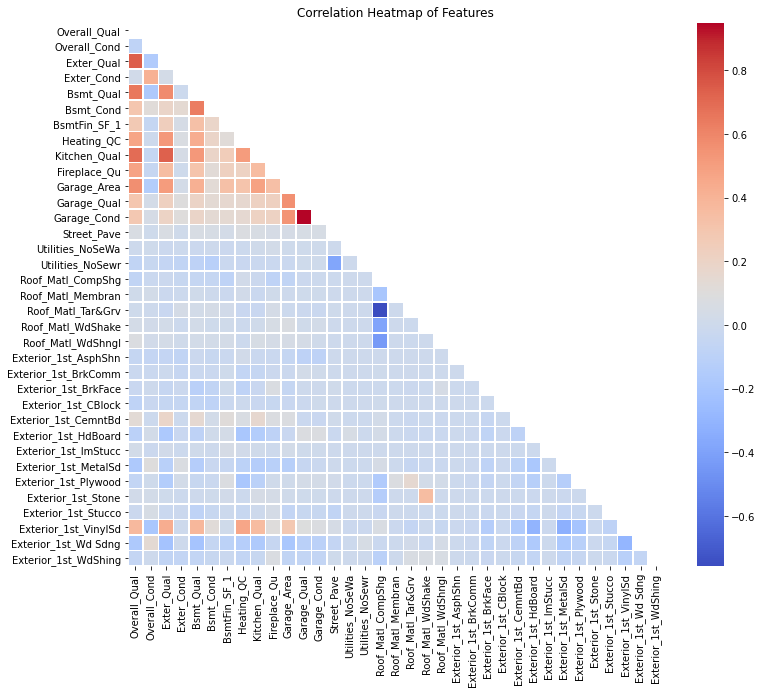

In [294]:
# Let us check model assumptions 
# First we will make a correlation heatmap for our features and also a heatmap with each feature to SalePrice

selected_columns = inf[G]
correlation_matrix = selected_columns.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=.5, mask=mask)
plt.title("Correlation Heatmap of Features")
plt.savefig('heatmaptotal.jpg', format='jpeg', dpi=300)

# With the exception of Garage_Cond/Garage_Qual and Roof_Matl_Tar&Grv/Roof_Matl_CompShg being highly correlated, everything is uncorrelated

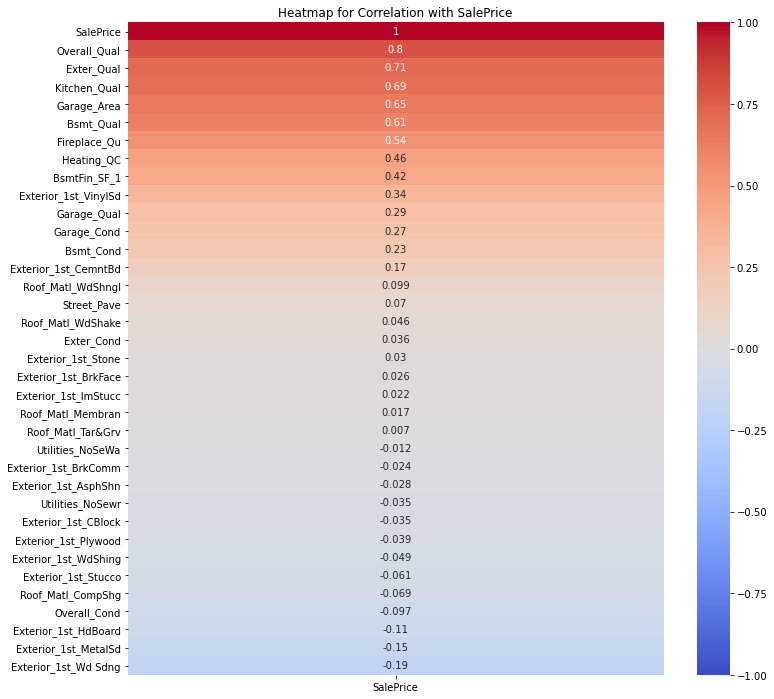

In [295]:
# And now a heatmap with just SalePrice
S = G + ['SalePrice']
corr_SP = inf[S].corr()[['SalePrice']].sort_values(by = 'SalePrice', ascending = False)

plt.figure(figsize = (12,12))
plt.title('Heatmap for Correlation with SalePrice')
sns.heatmap(corr_SP,
            annot = True, 
            vmin = -1, vmax = 1, 
            cmap = 'coolwarm')
plt.savefig('heatmapsingular.jpg', format='jpeg', dpi=300)


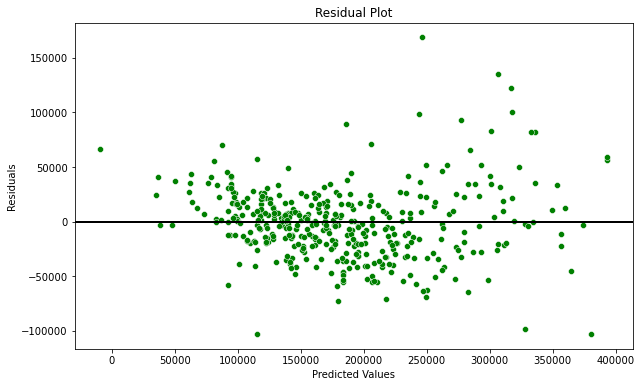

In [296]:
# Next we will plot the residuals 

y_pred = lr.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color='green')
plt.axhline(y=0, color='black', linestyle='-', linewidth=2)
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.savefig('residuals.jpg', format='jpeg', dpi=300)

# Definitely not random, it is centered around 0 too much